In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from collections import namedtuple
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv(r'/content/IMDb Movies India.csv',encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
df['Duration'].unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [8]:
df['Votes'].unique()

array([nan, '8', '35', ..., '70,344', '408', '1,496'], dtype=object)

**Data Pre-Processing**

In [9]:
df['Duration']= df['Duration'].str.replace('min','').apply(pd.to_numeric)
df["Votes"]=df["Votes"].replace("$5.16M", 516)
df["Votes"] = pd.to_numeric(df['Votes'].str.replace(',',''))

In [10]:
df.dropna(subset=['Year'],inplace=True)
df.dropna(subset=['Genre'],inplace=True)
df['Rating'].fillna(df['Rating'].mode().max(),inplace=True)
df['Duration'].fillna(df['Duration'].mean(),inplace=True)
df['Votes'].fillna(df['Votes'].mean(),inplace=True)

In [11]:
df.isna().sum()

Name           0
Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director     481
Actor 1     1111
Actor 2     1539
Actor 3     2054
dtype: int64

In [12]:
df.duplicated().sum()

4

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

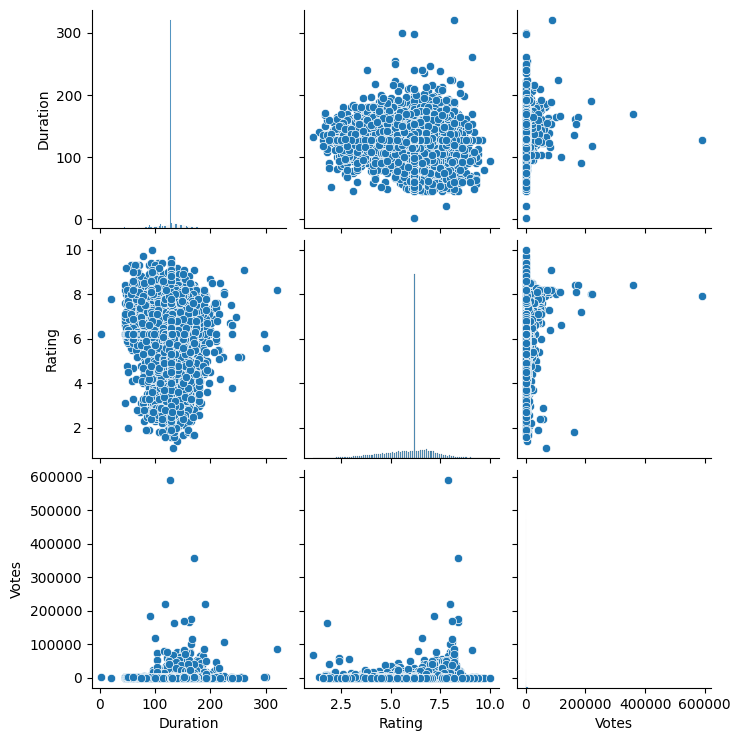

In [15]:
import seaborn as sns
sns.pairplot(df)

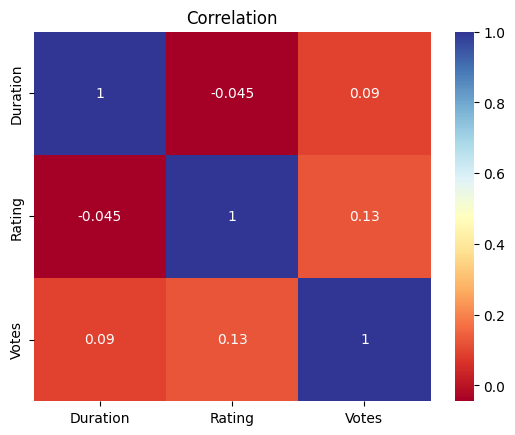

In [16]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.title('Correlation')
plt.show()

In [17]:
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric_columns)

Index(['Name', 'Year', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')


In [18]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

**Biulding Models**

In [19]:
# Extracting the numeric part from the 'Year' column
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)

# Encoding categorical variables based on mean ratings
actor1_encoding_map = df.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()['Rating']
actor2_encoding_map = df.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()['Rating']
actor3_encoding_map = df.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()['Rating']
director_encoding_map = df.groupby('Director').agg({'Rating': 'mean'}).to_dict()['Rating']
genre_encoding_map = df.groupby('Genre').agg({'Rating': 'mean'}).to_dict()['Rating']

df['actor1_encoded'] = round(df['Actor 1'].map(actor1_encoding_map), 1)
df['actor2_encoded'] = round(df['Actor 2'].map(actor2_encoding_map), 1)
df['actor3_encoded'] = round(df['Actor 3'].map(actor3_encoding_map), 1)
df['director_encoded'] = round(df['Director'].map(director_encoding_map), 1)
df['genre_encoded'] = round(df['Genre'].map(genre_encoding_map), 1)

# Drop original categorical columns
df.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)

# Define features and target variable
X = df[['Year', 'Duration', 'Votes', 'actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'director_encoded', 'genre_encoded']]
y = df['Rating']

In [20]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Evaluate Linear Regression
print('Linear Regression Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, lr_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, lr_pred))
print('R2 Score:', r2_score(y_test, lr_pred))

Linear Regression Metrics:
Mean Squared Error: 0.36795250591808304
Mean Absolute Error: 0.4309750296187486
R2 Score: 0.7107884408262335


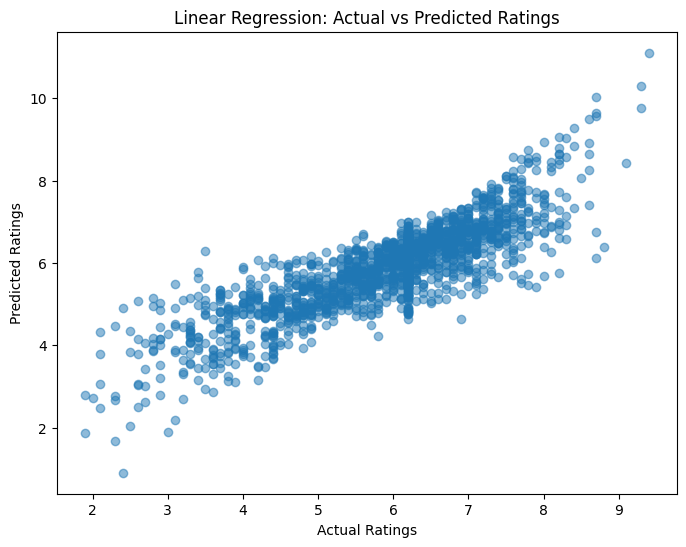

In [22]:
# Scatter plot for Linear Regression predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

In [23]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluate Random Forest Regressor
print('\nRandom Forest Regressor Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))


Random Forest Regressor Metrics:
Mean Squared Error: 0.2694165584122688
Mean Absolute Error: 0.30691384754172824
R2 Score: 0.7882379337756452


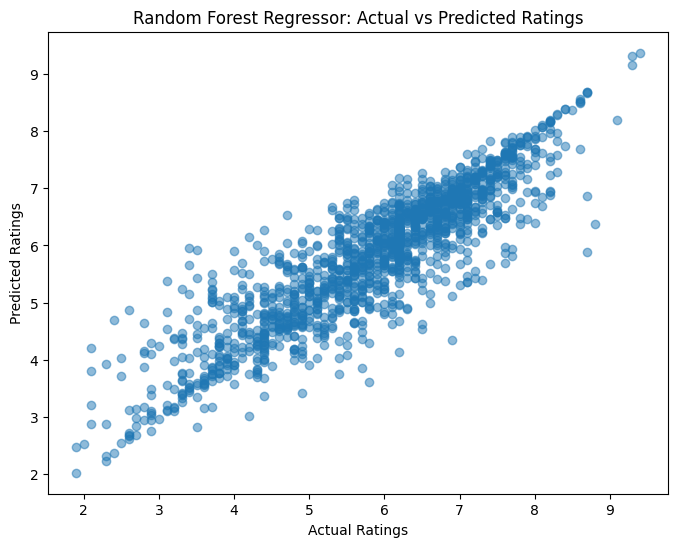

In [24]:
# Scatter plot for Random Forest Regressor predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.title('Random Forest Regressor: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

In [27]:
# Decision Tree Regressor
drf = DecisionTreeRegressor()
drf.fit(X_train, y_train)
drf_pred = drf.predict(X_test)

# Evaluate  Decision Tree Regressor
print('\nDecision Tree Regressor Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, drf_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, drf_pred))
print('R2 Score:', r2_score(y_test, drf_pred))


Decision Tree Regressor Metrics:
Mean Squared Error: 0.5385520974289579
Mean Absolute Error: 0.42990527740190937
R2 Score: 0.576696749475578


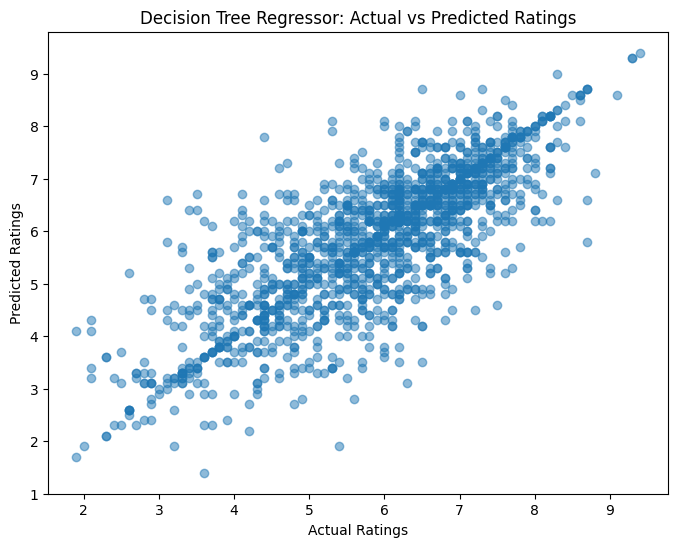

In [28]:
# Scatter plot for Decision Tree Regressor predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, drf_pred, alpha=0.5)
plt.title('Decision Tree Regressor: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()